# Analysing Polygons, LineStrings and Points with Python

## Preparing the Rivers and Lakes

<p>The first step is to download the data. The best way to load shapefiles with Python is using geopandas, which is pandas with a geospatial element. The data contains a series of values to describe the rivers as well as the rivers geometry.</p>

In [1]:
import geopandas as gpd
africa_rivers = gpd.read_file("river-dataset/africa/afrivs.shp")
print(africa_rivers)

/usr/local/lib/python3.8/site-packages/geopandas/_compat.py:112: UserWarning: The Shapely GEOS version (3.10.2-CAPI-1.16.0) is incompatible with the GEOS version PyGEOS was compiled with (3.10.1-CAPI-1.16.0). Conversions between both will be slow.
  warnings.warn(


           cat     AREA  UP_CELLS  DISCHARGE  WIDTH  WIDTH5  WIDTH95  DEPTH  \
0            1    24.56       142       0.55   5.32    1.94    14.74   0.21   
1            2    34.98       199       0.79   6.38    2.32    17.81   0.25   
2            3    97.00       566       2.25  10.80    3.84    30.78   0.37   
3            4    74.98       111       1.72   9.45    3.38    26.81   0.33   
4            5   408.69       106       9.91  22.66    7.82    66.56   0.66   
...        ...      ...       ...        ...    ...     ...      ...    ...   
566428  566429   295.52       379       1.81   9.69    3.46    27.52   0.34   
566429  566430   676.00      1115      12.32  25.28    8.68    74.57   0.72   
566430  566431  1983.77       830      11.60  24.52    8.43    72.24   0.70   
566431  566432   802.29      1335       4.80  15.77    5.52    45.66   0.50   
566432  566433  1400.37       442       1.37   8.43    3.03    23.81   0.31   

        DEPTH5  DEPTH95   ARCID  \
0         0.10  

<p>The lake dataset used here comes from NaturalEarth which can be found here. Below, the lakes are loaded as a GeoDataFrame of Polygons which describe each lake.</p>

<code>brew install spatialindex</code>

In [2]:
lakes = gpd.read_file("river-dataset/packages/Natural_Earth_quick_start/10m_physical/ne_10m_lakes.shp")
country_shapefiles = gpd.read_file("river-dataset/packages/Natural_Earth_quick_start/10m_cultural/ne_10m_admin_0_countries.shp")
africa = country_shapefiles.loc[country_shapefiles['CONTINENT'] == 'Africa']
africa_lakes = gpd.sjoin(lakes, africa, op='intersects')
africa_lakes = lakes.loc[lakes.index.isin(africa_lakes.index.tolist())]
excluded_rivers = gpd.sjoin(africa_rivers, africa_lakes, op='within')
africa_rivers = africa_rivers.loc[~africa_rivers.index.isin(excluded_rivers.index.tolist())]

/usr/local/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3338: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if await self.run_code(code, result, async_=asy):
/usr/local/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3338: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if await self.run_code(code, result, async_=asy):


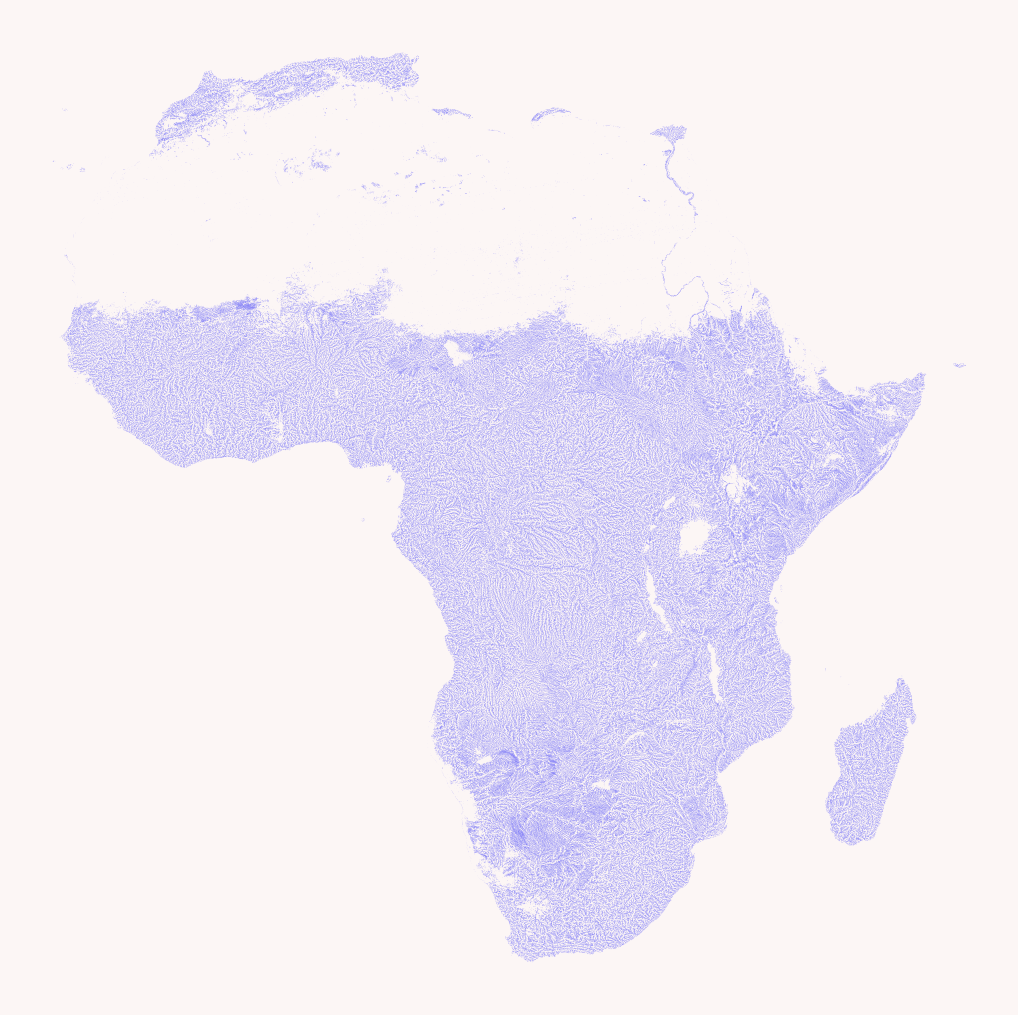

In [3]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(facecolor='#FCF6F5FF')
fig.set_size_inches(18, 22)

africa_rivers.plot(ax=ax, color='blue', lw=0.1)
africa_lakes.plot(ax=ax, color='#FCF6F5FF', alpha=1)

ax.axis('off')

plt.show()

## River Basins

<p>River basin Polygons can be found in the hydrosheds database.</p>

In [23]:
basins = gpd.read_file("hybas_af_lev01-12_v1c/hybas_af_lev10_v1c.shp")
print(basins)

          HYBAS_ID   NEXT_DOWN   NEXT_SINK    MAIN_BAS  DIST_SINK  DIST_MAIN  \
0       1100000010           0  1100000010  1100000010        0.0        0.0   
1       1100000020           0  1100000020  1100000020        0.0        0.0   
2       1101694330  1100000020  1100000020  1100000020       19.5       19.5   
3       1101693980  1101694330  1100000020  1100000020       35.3       35.3   
4       1100000030           0  1100000030  1100000030        0.0        0.0   
...            ...         ...         ...         ...        ...        ...   
209363  1100082530  1101218980  1100082530  1100009010        0.0      415.8   
209364  1100082540           0  1100082540  1100082540        0.0        0.0   
209365  1100082570           0  1100082570  1100082570        0.0        0.0   
209366  1100082590  1101221570  1100082590  1100009010        0.0      417.3   
209367  1100082610           0  1100082610  1100082610        0.0        0.0   

        SUB_AREA  UP_AREA     PFAF_ID  

In [26]:
basins = gpd.read_file("hybas_lake_af_lev01-12_v1c/hybas_lake_af_lev12_v1c.shp")
print(basins)

          HYBAS_ID   NEXT_DOWN   NEXT_SINK    MAIN_BAS  DIST_SINK  DIST_MAIN  \
0       1120000010           0  1120000010  1120000010        0.0        0.0   
1       1120000020           0  1120000020  1120000020        0.0        0.0   
2       1121694330  1120000020  1120000020  1120000020       19.5       19.5   
3       1121693980  1121694330  1120000020  1120000020       35.3       35.3   
4       1120000030           0  1120000030  1120000030        0.0        0.0   
...            ...         ...         ...         ...        ...        ...   
241021  1120082570           0  1120082570  1120082570        0.0        0.0   
241022  1120082580           0  1120082580  1120082580        0.0        0.0   
241023  1120082592  1129226001  1120082592  1120009010        0.0      447.4   
241024  1120082600           0  1120082600  1120082600        0.0        0.0   
241025  1120082610           0  1120082610  1120082610        0.0        0.0   

        SUB_AREA  UP_AREA       PFAF_ID